<a href="https://colab.research.google.com/github/didi-a-p/BootcampDataScienceAlura/blob/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/Analise_Dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import plotly.express as px

In [2]:
url = "https://raw.githubusercontent.com/didi-a-p/BootcampDataScienceAlura/main/Analisando%20dados%20da%20sa%C3%BAde%20com%20Python%20e%20Pandas/dados/DUENGUE.csv"

In [3]:
dados = pd.read_csv(url,
                    sep=";",
                    skiprows=4,
                    skipfooter=7,
                    encoding="ISO-8859-1",
                    engine='python',
                    thousands='.',
                    decimal=',',
                   )
dados

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,...,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128,101277
1,.. Rondônia,-,-,-,-,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,...,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3,23070
2,.. Acre,-,-,-,-,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,...,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51,4927
3,.. Amazonas,-,-,-,-,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,...,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52,6520
4,.. Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,-,2,3,-,-,1,2,3,2,4,5,-,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,-,1,-,1,1,-,-,-,-,-,-,-,4109
5,.. Pará,-,4,12,38,163,610,1374,1326,1276,1392,782,429,204,167,181,218,342,370,547,754,896,688,457,364,254,170,115,151,220,236,330,431,703,636,613,557,471,604,635,...,74,81,112,133,100,56,44,53,55,47,44,56,101,128,151,168,150,76,60,51,48,45,70,46,136,178,137,54,36,18,3,13,8,8,11,16,16,29,21,51244
6,.. Amapá,-,-,-,1,-,4,22,29,19,15,13,12,14,13,16,6,16,10,25,25,26,21,13,7,6,7,11,3,6,2,4,11,18,9,20,15,30,38,19,...,1,4,13,7,4,3,3,2,4,3,2,1,3,2,-,2,2,1,2,1,-,4,1,2,2,-,1,3,-,-,-,-,-,-,-,-,1,-,-,1609
7,.. Tocantins,-,-,-,1,10,93,232,209,293,302,130,25,13,19,6,8,15,51,120,110,124,138,117,90,28,32,28,33,58,121,206,199,205,215,150,69,26,23,15,...,11,6,26,21,27,9,1,3,3,8,14,55,95,118,86,113,71,55,15,11,8,3,8,8,29,25,15,14,8,5,2,-,1,2,1,2,-,1,1,9798
8,Região Nordeste,1,24,41,76,187,515,1639,2490,5181,9845,7042,3285,1482,854,532,539,610,803,1653,3189,6105,5036,3175,2100,1282,859,596,565,710,921,1328,2126,4107,4434,5404,4660,3555,2598,1969,...,368,337,570,843,1140,970,720,465,300,275,258,243,352,607,931,1770,3030,2601,2037,1396,968,715,461,379,502,946,982,942,932,762,569,306,213,153,144,123,174,190,153,289495
9,.. Maranhão,-,17,23,22,43,74,224,334,616,763,483,197,79,58,74,30,46,72,173,191,345,361,385,291,112,81,44,61,47,97,157,214,256,407,332,310,308,431,342,...,85,49,47,95,96,48,23,27,18,17,17,27,86,148,216,438,421,249,142,105,104,43,37,65,79,149,118,66,65,43,33,23,17,6,6,6,24,16,13,39072


In [4]:
dados_regiao = dados.loc[[0,8,18,23,27]]
dados_regiao.reset_index(drop=True, inplace=True)

In [5]:
dados_regiao

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,...,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128,101277
1,Região Nordeste,1,24,41,76,187,515,1639,2490,5181,9845,7042,3285,1482,854,532,539,610,803,1653,3189,6105,5036,3175,2100,1282,859,596,565,710,921,1328,2126,4107,4434,5404,4660,3555,2598,1969,...,368,337,570,843,1140,970,720,465,300,275,258,243,352,607,931,1770,3030,2601,2037,1396,968,715,461,379,502,946,982,942,932,762,569,306,213,153,144,123,174,190,153,289495
2,Região Sudeste,-,-,-,10,36,281,1301,1999,5899,7524,3268,1080,264,142,136,141,199,311,666,1093,1767,1613,1343,690,302,149,94,85,192,369,1063,2446,4236,4563,3739,1409,733,610,407,...,282,304,368,532,442,236,190,129,89,170,226,465,1060,1989,3259,5579,6624,3020,1005,348,228,285,285,480,1556,2537,2140,1353,708,244,134,85,84,86,83,85,162,290,287,189135
3,Região Sul,-,-,-,-,5,9,38,30,64,76,27,9,10,10,8,10,14,15,24,14,37,30,21,3,7,2,4,6,8,15,70,297,732,651,316,68,37,25,29,...,37,39,40,41,20,4,6,3,10,12,25,12,46,117,215,404,476,230,83,29,22,35,94,257,971,2269,2484,1290,462,120,53,30,33,39,41,47,60,98,89,27680
4,Região Centro-Oeste,-,1,3,21,48,203,676,769,1360,1803,828,357,115,84,75,101,84,154,261,370,887,1293,1373,641,381,283,299,463,1219,2456,3945,3898,4003,2740,1663,656,311,221,238,...,538,834,951,974,890,401,176,129,114,136,279,533,713,1086,1596,2335,2574,1515,503,226,196,205,217,469,1452,2118,1967,1166,791,382,181,95,82,77,104,116,157,239,143,118327


In [6]:
dados_uf = dados.loc[[1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,19,20,21,22,24,25,26,28,29,30,21]]
dados_uf.reset_index(drop=True, inplace=True)

In [7]:
dados_uf.head()

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,.. Rondônia,-,-,-,-,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,...,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3,23070
1,.. Acre,-,-,-,-,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,...,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51,4927
2,.. Amazonas,-,-,-,-,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,...,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52,6520
3,.. Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,-,2,3,-,-,1,2,3,2,4,5,-,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,-,1,-,1,1,-,-,-,-,-,-,-,4109
4,.. Pará,-,4,12,38,163,610,1374,1326,1276,1392,782,429,204,167,181,218,342,370,547,754,896,688,457,364,254,170,115,151,220,236,330,431,703,636,613,557,471,604,635,...,74,81,112,133,100,56,44,53,55,47,44,56,101,128,151,168,150,76,60,51,48,45,70,46,136,178,137,54,36,18,3,13,8,8,11,16,16,29,21,51244


In [8]:
# limpando o nome dos estados
nomes_uf = []
for i in dados_uf['Região/Unidade da Federação']:
    x = i.replace(".. ", "")
    nomes_uf.append(x)
    
dados_uf['Região/Unidade da Federação'] = nomes_uf
dados_uf.head()

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Rondônia,-,-,-,-,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,...,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3,23070
1,Acre,-,-,-,-,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,...,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51,4927
2,Amazonas,-,-,-,-,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,...,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52,6520
3,Roraima,-,-,-,-,-,-,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,...,-,2,3,-,-,1,2,3,2,4,5,-,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,-,1,-,1,1,-,-,-,-,-,-,-,4109
4,Pará,-,4,12,38,163,610,1374,1326,1276,1392,782,429,204,167,181,218,342,370,547,754,896,688,457,364,254,170,115,151,220,236,330,431,703,636,613,557,471,604,635,...,74,81,112,133,100,56,44,53,55,47,44,56,101,128,151,168,150,76,60,51,48,45,70,46,136,178,137,54,36,18,3,13,8,8,11,16,16,29,21,51244


In [9]:
dados_uf.columns[1:-1]

Index(['2007/Jul', '2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez',
       '2008/Jan', '2008/Fev', '2008/Mar', '2008/Abr',
       ...
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov',
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar'],
      dtype='object', length=165)

In [10]:
dados_uf_melt = dados_uf.melt(id_vars='Região/Unidade da Federação',  value_vars=dados_uf.columns[1:-1], var_name= 'Ano/Mês', value_name= 'Casos')
dados_uf_melt

,Região/Unidade da Federação,Ano/Mês,Casos
0,Rondônia,2007/Jul,-
1,Acre,2007/Jul,-
2,Amazonas,2007/Jul,-
3,Roraima,2007/Jul,-
4,Pará,2007/Jul,-
...,...,...,...
4450,Rio Grande do Sul,2021/Mar,3
4451,Mato Grosso do Sul,2021/Mar,33
4452,Mato Grosso,2021/Mar,53
4453,Goiás,2021/Mar,47


In [11]:
#@title
# pacotes para ver os dados
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px
 
# gambiarra pra visualizar os gráficos interativos
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [12]:
configure_plotly_browser_state()

px.line(dados_uf_melt,
        x='Ano/Mês',
        y='Casos',
        color='Região/Unidade da Federação',
        template='plotly_dark',
        labels={'Região/Unidade da Federação': 'UF'},
        hover_name= 'Ano/Mês')


In [13]:
dados_uf_2 = dados_uf[dados_uf.columns[1:-1]].replace("-", 0)
dados_uf_2 = dados_uf_2.set_index(dados_uf['Região/Unidade da Federação'])

In [14]:
# Transformando strings em numeros
def converter_valores(df):
    df2 = df
    cols = df2.columns
    for c in cols:
        df2[c] = pd.to_numeric(df2[c])
    return df2

In [15]:
dados_uf_2 = converter_valores(dados_uf_2)

In [16]:
dados_uf_2.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,0,0,0,0,2,77,202,237,237,208,67,29,22,21,19,11,44,49,169,278,469,372,293,136,120,131,126,266,667,1254,1600,1026,513,342,171,98,65,55,70,95,...,29,44,43,52,56,42,16,17,12,15,25,12,15,30,17,39,33,39,38,52,21,20,28,50,73,96,103,115,43,33,35,16,8,13,16,13,21,11,16,3
Acre,0,0,0,0,1,3,15,13,12,26,18,6,5,1,7,7,9,35,115,155,120,63,33,24,20,10,6,19,33,65,96,161,146,102,54,22,15,8,9,31,...,7,14,18,12,13,9,12,6,8,11,32,39,44,48,25,30,18,16,11,13,9,19,25,45,82,100,81,27,10,7,4,6,6,6,8,29,107,81,101,51
Amazonas,0,0,0,0,1,61,175,246,247,209,72,19,15,11,9,7,8,24,35,47,42,31,21,21,16,12,8,5,12,8,9,12,38,41,67,76,62,67,56,69,...,3,4,1,3,5,10,9,5,2,6,5,1,6,7,7,12,3,9,8,5,3,3,8,37,59,38,44,40,20,13,23,21,18,6,14,30,36,42,55,52
Roraima,0,0,0,0,0,0,7,13,32,90,107,108,163,194,106,64,55,54,67,116,122,75,60,36,60,75,57,39,32,26,46,88,170,138,180,224,150,92,49,24,...,0,0,2,3,0,0,1,2,3,2,4,5,0,5,12,12,2,2,2,8,7,8,26,30,20,27,18,3,0,1,0,1,1,0,0,0,0,0,0,0
Pará,0,4,12,38,163,610,1374,1326,1276,1392,782,429,204,167,181,218,342,370,547,754,896,688,457,364,254,170,115,151,220,236,330,431,703,636,613,557,471,604,635,738,...,56,74,81,112,133,100,56,44,53,55,47,44,56,101,128,151,168,150,76,60,51,48,45,70,46,136,178,137,54,36,18,3,13,8,8,11,16,16,29,21


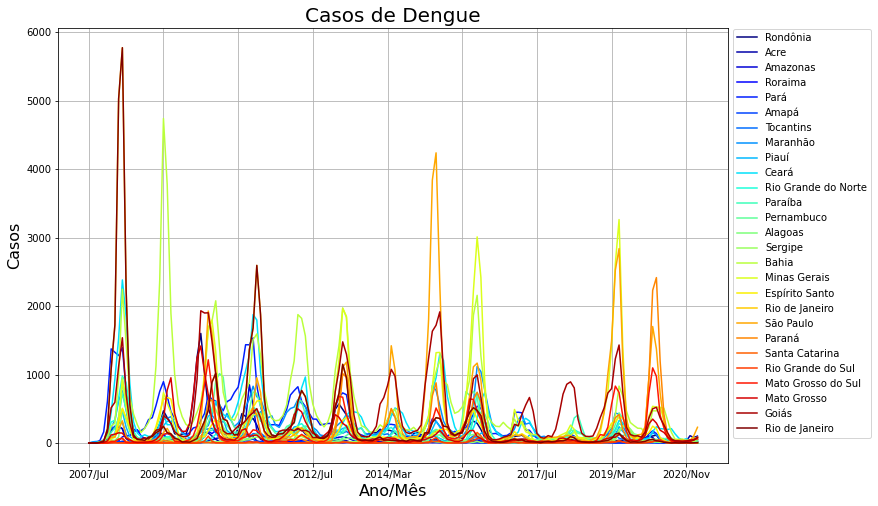

In [17]:
ax = dados_uf_2.iloc[:,:-1].T.plot(figsize=(12,8), cmap=plt.get_cmap('jet'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel('Ano/Mês', fontsize=16)
ax.set_ylabel('Casos', fontsize=16)
plt.title('Casos de Dengue', fontsize=20)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

### Por região

In [18]:
dados_regiao.head()

,Região/Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,Região Norte,-,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,...,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128,101277
1,Região Nordeste,1,24,41,76,187,515,1639,2490,5181,9845,7042,3285,1482,854,532,539,610,803,1653,3189,6105,5036,3175,2100,1282,859,596,565,710,921,1328,2126,4107,4434,5404,4660,3555,2598,1969,...,368,337,570,843,1140,970,720,465,300,275,258,243,352,607,931,1770,3030,2601,2037,1396,968,715,461,379,502,946,982,942,932,762,569,306,213,153,144,123,174,190,153,289495
2,Região Sudeste,-,-,-,10,36,281,1301,1999,5899,7524,3268,1080,264,142,136,141,199,311,666,1093,1767,1613,1343,690,302,149,94,85,192,369,1063,2446,4236,4563,3739,1409,733,610,407,...,282,304,368,532,442,236,190,129,89,170,226,465,1060,1989,3259,5579,6624,3020,1005,348,228,285,285,480,1556,2537,2140,1353,708,244,134,85,84,86,83,85,162,290,287,189135
3,Região Sul,-,-,-,-,5,9,38,30,64,76,27,9,10,10,8,10,14,15,24,14,37,30,21,3,7,2,4,6,8,15,70,297,732,651,316,68,37,25,29,...,37,39,40,41,20,4,6,3,10,12,25,12,46,117,215,404,476,230,83,29,22,35,94,257,971,2269,2484,1290,462,120,53,30,33,39,41,47,60,98,89,27680
4,Região Centro-Oeste,-,1,3,21,48,203,676,769,1360,1803,828,357,115,84,75,101,84,154,261,370,887,1293,1373,641,381,283,299,463,1219,2456,3945,3898,4003,2740,1663,656,311,221,238,...,538,834,951,974,890,401,176,129,114,136,279,533,713,1086,1596,2335,2574,1515,503,226,196,205,217,469,1452,2118,1967,1166,791,382,181,95,82,77,104,116,157,239,143,118327


In [19]:
dados_regiao_2 = dados_regiao[dados_regiao.columns[1:-1]].replace("-", 0)
dados_regiao_2 = dados_regiao_2.set_index(dados_regiao['Região/Unidade da Federação'])
dados_regiao_2 = converter_valores(dados_regiao_2)

In [20]:
dados_regiao_2.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Região/Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Região Norte,0,4,12,40,177,848,2027,2073,2116,2242,1189,628,436,426,344,321,489,593,1078,1485,1799,1388,994,678,504,437,351,516,1028,1712,2291,1928,1793,1483,1255,1061,819,887,853,1013,...,100,148,155,221,235,192,106,78,83,96,124,117,177,289,309,330,339,289,191,155,103,106,139,241,290,428,449,338,144,98,85,49,46,34,48,84,182,151,202,128
Região Nordeste,1,24,41,76,187,515,1639,2490,5181,9845,7042,3285,1482,854,532,539,610,803,1653,3189,6105,5036,3175,2100,1282,859,596,565,710,921,1328,2126,4107,4434,5404,4660,3555,2598,1969,1663,...,266,368,337,570,843,1140,970,720,465,300,275,258,243,352,607,931,1770,3030,2601,2037,1396,968,715,461,379,502,946,982,942,932,762,569,306,213,153,144,123,174,190,153
Região Sudeste,0,0,0,10,36,281,1301,1999,5899,7524,3268,1080,264,142,136,141,199,311,666,1093,1767,1613,1343,690,302,149,94,85,192,369,1063,2446,4236,4563,3739,1409,733,610,407,334,...,196,282,304,368,532,442,236,190,129,89,170,226,465,1060,1989,3259,5579,6624,3020,1005,348,228,285,285,480,1556,2537,2140,1353,708,244,134,85,84,86,83,85,162,290,287
Região Sul,0,0,0,0,5,9,38,30,64,76,27,9,10,10,8,10,14,15,24,14,37,30,21,3,7,2,4,6,8,15,70,297,732,651,316,68,37,25,29,25,...,34,37,39,40,41,20,4,6,3,10,12,25,12,46,117,215,404,476,230,83,29,22,35,94,257,971,2269,2484,1290,462,120,53,30,33,39,41,47,60,98,89
Região Centro-Oeste,0,1,3,21,48,203,676,769,1360,1803,828,357,115,84,75,101,84,154,261,370,887,1293,1373,641,381,283,299,463,1219,2456,3945,3898,4003,2740,1663,656,311,221,238,286,...,242,538,834,951,974,890,401,176,129,114,136,279,533,713,1086,1596,2335,2574,1515,503,226,196,205,217,469,1452,2118,1967,1166,791,382,181,95,82,77,104,116,157,239,143


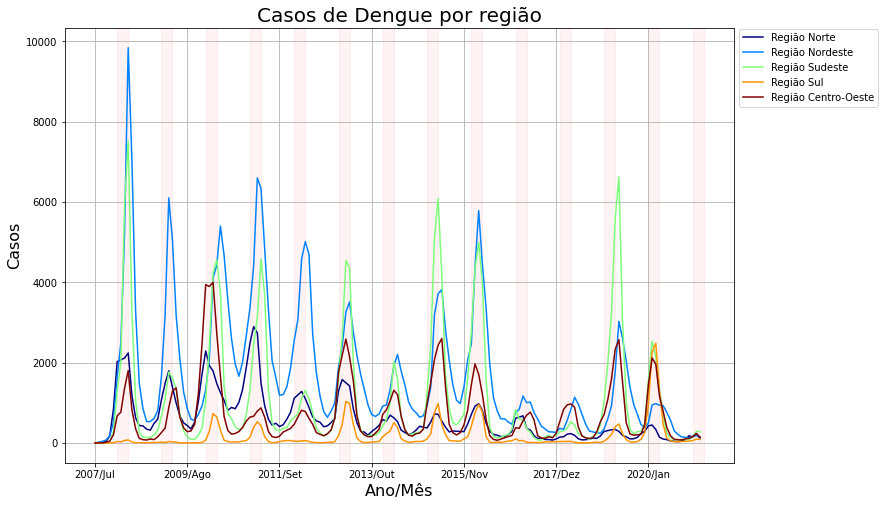

In [21]:
# highlight idea from AkiraG - https://github.com/AkiraG/DSBootCamp-Alura/blob/main/M%C3%B3dulos/01/M%C3%B3dulo%2001%20-%20Aulas%20%2B%20Desafios.ipynb

ax = dados_regiao_2.T.plot(figsize=(12,8), cmap=plt.get_cmap('jet'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
ax.set_xlabel('Ano/Mês', fontsize=16)
ax.set_ylabel('Casos', fontsize=16)
for month in range(0, 165, 12):
    plt.axvspan(month+6, month+9, color='red', alpha=0.05)
plt.title('Casos de Dengue por região', fontsize=20)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1.01))
plt.show()

In [22]:
range(0, 165, 12)

range(0, 165, 12)

In [23]:
dados_regiao_melt = dados_regiao.melt(id_vars='Região/Unidade da Federação',  value_vars=dados_regiao.columns[1:-1], var_name= 'Ano/Mês', value_name= 'Casos')
dados_regiao_melt.head()

,Região/Unidade da Federação,Ano/Mês,Casos
0,Região Norte,2007/Jul,-
1,Região Nordeste,2007/Jul,1
2,Região Sudeste,2007/Jul,-
3,Região Sul,2007/Jul,-
4,Região Centro-Oeste,2007/Jul,-


In [25]:
configure_plotly_browser_state()

fig = px.line(dados_regiao_melt,
              x='Ano/Mês',
              y='Casos',
              color='Região/Unidade da Federação',
              template='plotly_dark',
              labels={'Região/Unidade da Federação': 'Região'},
              hover_name= 'Ano/Mês')
fig.show()